In [1]:
import os
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore') 
%matplotlib inline
data_raw = load_iris()
X = data_raw['data']
y0 = data_raw['target'].reshape(-1,1)
y = to_categorical(y0, num_classes=3)
header = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species_0','Species_1', 'Species_2']
df = pd.DataFrame(np.concatenate([X,y],axis=1),columns=header)
df.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species_0,Species_1,Species_2
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


In [3]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=123)
n_vars = X_train.shape[1]
my_model = Sequential()
my_model.add(Dense(input_dim=n_vars, units = 3, activation="softmax"))
my_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
n_epochs = 500
batch_size = 10
learn_rate = 0.005

In [7]:
my_optimizer=Adam(learning_rate = learn_rate)
my_model.compile(loss = "categorical_crossentropy", optimizer = my_optimizer,metrics=["accuracy"])

In [9]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size =batch_size, validation_split = 0.2, verbose = 0)

In [10]:
my_summary.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

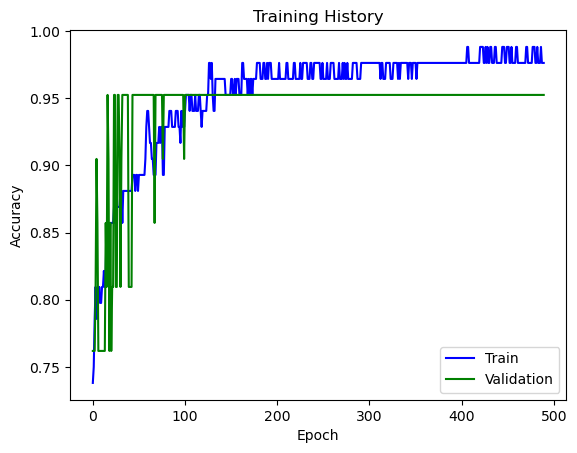

In [13]:
n_skip = 10
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


In [15]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.956
